# M6_AI4: Recaudación de películas (IMDB)
#### Autor: Leandro Gutierrez
#### Este documento intenta dar respuesta a la actividad individual 4 propuesta en el Modulo **Técnicas de Machine Learning**. En él se describirán cada uno de los enunciados postulados y los resultados obtenidos.
#### Noviembre 24, 2024

Disponemos de un dataset con información de inmuebles vendidos en el Condado de King, incluida la ciudad de Seattle, entre mayo de 2014 y mayo de 2015.

El objetivo de la práctica consiste en utilizar dos de los algoritmos vistos en el módulo para la estimación de los precios de venta de inmuebles en este condado y para esas fechas.

Las variables son las siguientes: 

- Id: identificador del inmueble. 
- Date: fecha de venta en formato “YYYYMMDDT000000”. 
- Price: precio de venta final en $. 
- Bedrooms: número de habitaciones del inmueble. 
- Bathrooms: número de aseos del inmueble. 
- Sqft_living: área del inmueble en pies cuadrados. 
- Sqft_lot: área de la parcela en la que se encuentra. 
- Floors: número de pisos del inmueble. 
- Waterfront: valor = 0 si no tiene vistas al mar; valor = 1 si tiene vistas al mar. 
- View: nos dice si ha sido visitada por potenciales compradores muchas o pocas veces (0 pocas, 4 muchas). 
- Condition: condición en la que se encuentra el inmueble (1 mal, 5 muy bien). 
- Grade: calificación dada al inmueble, basada en un sistema propio del Condado de King (cuanto mayor es el valor, mejor es el - inmueble). 
- Sqft_above: área en pies cuadrados del inmueble si no contamos el sótano. 
- Sqft_basement: área en pies cuadrados del sótano. 
- Yr_built: año de construcción. 
- Yr_renovated: año en que fue reformado/restaurado. 
- Zipcode: parecido al código postal español. 
- Lat: latitud en grados. 
- Lon: longitud en grados. 
- Sqft_living: área media de los 15 inmuebles vecinos más cercanos. 
- Sqft_lot15: área media de las 15 parcelas vecinas más cercanas. 

**Con todos estos datos os pedimos lo siguiente:**

1. Preprocesado: 
    - Convertir las áreas a metros cuadrados. 
    - Convertir la fecha de venta en string “YYYYMMDD”. 
1. Estimación de precios: 
    - Utilizar el algoritmo de Árboles de Decisión. 
    - Utilizar el algoritmo de Random Forest. 
    - Utilizar el algoritmo de Grandient Boodting.
1. Evaluación de los modelos: 
    - Comparar los valores de R2 de ambos modelos. 
    - Comentar los resultados. 

# Solución

## 1. Preprocesamiento de los datos 

### Carga de datos

In [155]:
# importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# definimos el path donde buscar los datos
path = 'data/act4_kc_house_data.csv'

# creamos dataframe
df_org = pd.read_csv(path)

In [156]:
# previsualizamos los datos
df_org.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [157]:
# copiamos dataframe para no alterar original
df = df_org.copy()

### Análisis del dataset

In [158]:
df.shape

(21613, 21)

Nuestro dataset cuenta con un total de 21613 observaciones y 21 variables predictoras.

In [159]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Podemos observar que no se encuentran valores nulos en nuestro set de datos.

In [160]:
# resumen de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Es posible notar que la mayoría de las variables son de tipo `numérica` y fueron mapeadas a representaciones `int64` o `float64` dependiendo de su naturaleza (discreta o contínua) y de los datos con los que se cuenta, es así que por ejemplo variables como `bathrooms` o `floors` que uno tiende a pensarlos como datos de conteo discreto en este caso están representados con variables continuas, ya que se estima hacer afirmaciones como, "el piso cuenta con 1 baños completo y 1 toalet" lo que queda expresado como `bathrooms = 1.5`. De manera analoga opuesta, variables que describen metros cuadrados (`sqft_living`, `sqft_lot`, etc) solo poseen valores enteros.

Además vemos que la variable `date` está representada como object, debido de su formato alfanumérico `“YYYYMMDDT000000”`.

### Tratamiento de los datos

Lo primero que harémos será parsear los datos de la columna `date` para llevarlos al formato `YYYYMMDD`

In [161]:
# realizamos el split y nos quedamos con la primera parte del valor
df['date'] = df_org['date'].str.split('T').str[0]

# visualizamos el resultado
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


En segundo lugar y a pedido del enunciado haremos un cambio de unidades de medida para las variables de tipo `area`, donde pasaremos de valores expresado en $ft^2$ (pies cuadrados) a $m^2$ (metros cuadrados). Si bien este reescalado se entiende no afectará ni al cálculo ni a la precisión de nuestros modelos matemáticos, si mejoraremos nuestra capacidad de interpretar los resultados, ya que estamos acostumbrados a la unidad de medida `metro` por sobre `pies`.

Haremos el escalado utilizando la relación  $1ft^2=0.092903m^2$, además realizamos un casteo a entero para mejorar la legibilidad y la interpretación de los datos

In [162]:
# realizamos el escalado
df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] = df_org[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].apply(lambda x: (x * 0.092903).astype(int))

# visualizamos resultado
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,109,524,1.0,0,0,...,7,109,0,1955,0,98178,47.5112,-122.257,124,524
1,6414100192,20141209,538000.0,3,2.25,238,672,2.0,0,0,...,7,201,37,1951,1991,98125,47.7210,-122.319,157,709
2,5631500400,20150225,180000.0,2,1.00,71,929,1.0,0,0,...,6,71,0,1933,0,98028,47.7379,-122.233,252,748
3,2487200875,20141209,604000.0,4,3.00,182,464,1.0,0,0,...,7,97,84,1965,0,98136,47.5208,-122.393,126,464
4,1954400510,20150218,510000.0,3,2.00,156,750,1.0,0,0,...,8,156,0,1987,0,98074,47.6168,-122.045,167,697


### Analisis Exploratrio inicial de la variable Precio

In [163]:
# encontramos las medidas de centralización 
media = df['price'].mean()
mediana = df['price'].median()
modas = df['price'].mode()

# visualizamos las medidas
print(f'media: {media}')
print(f'mediana: {mediana}')
print('modas:\n', modas, sep="")


media: 540088.1417665294
mediana: 450000.0
modas:
0    350000.0
1    450000.0
Name: price, dtype: float64


In [164]:
# encontramos minimo y maximo
min = df['price'].min()
max = df['price'].max()

print(f'min: {min}')
print(f'max: {max}')

# encontramos varianza
var = df['price'].var()
print(f'var: {var}')

# encontramos desviacion standard
std = df['price'].std()
print(f'std: {std}')

min: 75000.0
max: 7700000.0
var: 134782378397.24687
std: 367127.19648269983


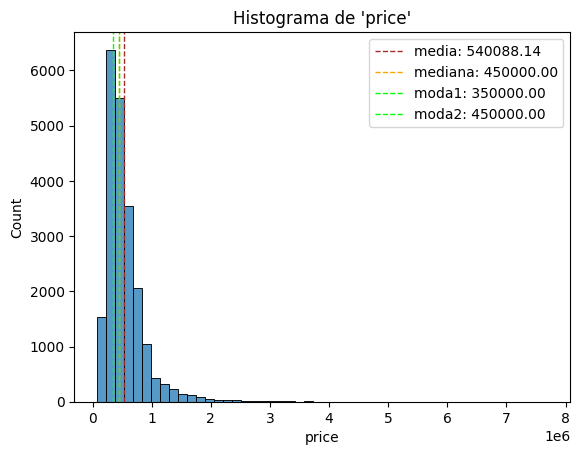

In [165]:
# creamos histograma de price
hist = sns.histplot(data=df, x='price', bins=50).set_title("Histograma de 'price'")
plt.axvline(media, color='brown', linestyle='dashed', linewidth=1, label=f'media: {media:.2f}')
plt.axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label=f'mediana: {mediana:.2f}')
plt.axvline(modas[1], color='lime', linestyle='dashed', linewidth=1, label=f'moda1: {modas[0]:.2f}')
plt.axvline(modas[0], color='lime', linestyle='dashed', linewidth=1, label=f'moda2: {modas[1]:.2f}')
plt.legend()

Podemos observar que tanto `mediana` y `modas` se encuentran posicionadas a izquierda de la `media`, se sospecha que la sensibilidad de la `media` a valores extremos es lo que la está llevando ligeramente hacia valores superiores, lo que puede indicar un sesgo positivo (hacia la derecha) en la distribución de los precios de los inmuebles.

In [166]:
# obtenemos Q1 y Q3
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# obtenemos rango intercuartílico
rq = q3 - q1

print(f'rq: {rq}')
lim_inferior = q1 - 1.5 * rq
lim_superior = q3 + 1.5 * rq

print(f'lim_inferior: {lim_inferior}')
print(f'lim_superior: {lim_superior}')

rq: 323050.0
lim_inferior: -162625.0
lim_superior: 1129575.0


Text(0.25, 75000.0, 'Mín: 75000.00')

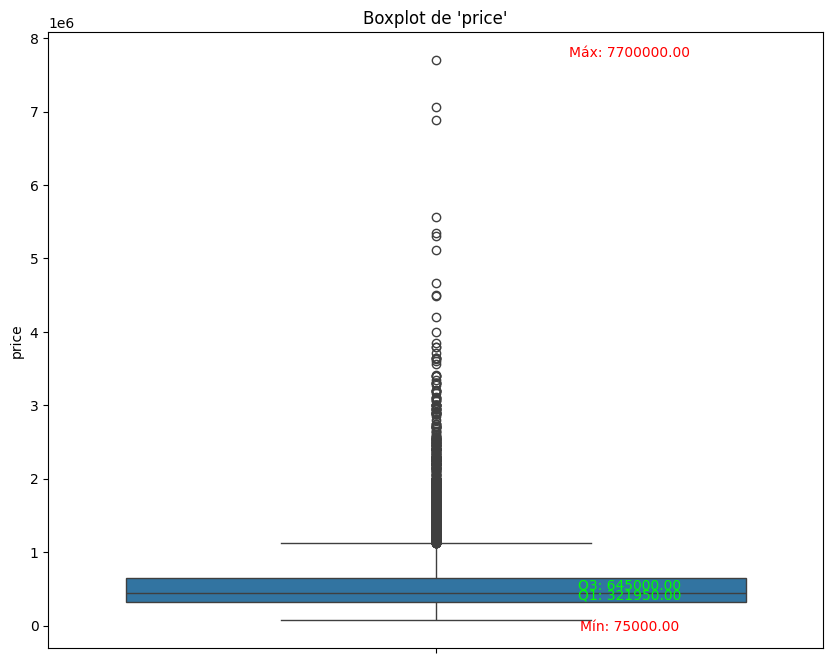

In [167]:
plt.figure(figsize=(10,8))

# creamos box-plot de la variable
sns.boxplot(df['price'])

# añadimos título y etiquetas
plt.title("Boxplot de 'price'")

# añadimos etiquetas a los valores representativos
plt.text(0.25, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', color='lime', fontsize=10)
plt.text(0.25, q3, f'Q3: {q3:.2f}', ha='center', va='top', color='lime', fontsize=10)
plt.text(0.25, max, f'Máx: {max:.2f}', ha='center', va='bottom', color='red', fontsize=10)
plt.text(0.25, min, f'Mín: {min:.2f}', ha='center', va='top', color='red', fontsize=10)

Del análisis de boxplot encontramos que, como habiamos mencionado anteriormente, existe un gran cantidad de valores clasificables como `outliers` o `extremos`. Todos ellos en valores por encima del límite máximo de los bigotes de nuestro boxplot, son con certeza los causantes del corrimiento de nuestra media hacia derecha en el gráfico de distribución de frecuencias para la variable `precio`.

A fin de continuar con el apartado no se tomarán medidas con estos valores, es decir formarán parte del dataset de análsis para nuestros modelos. 

### Histogramas de variables predictoras

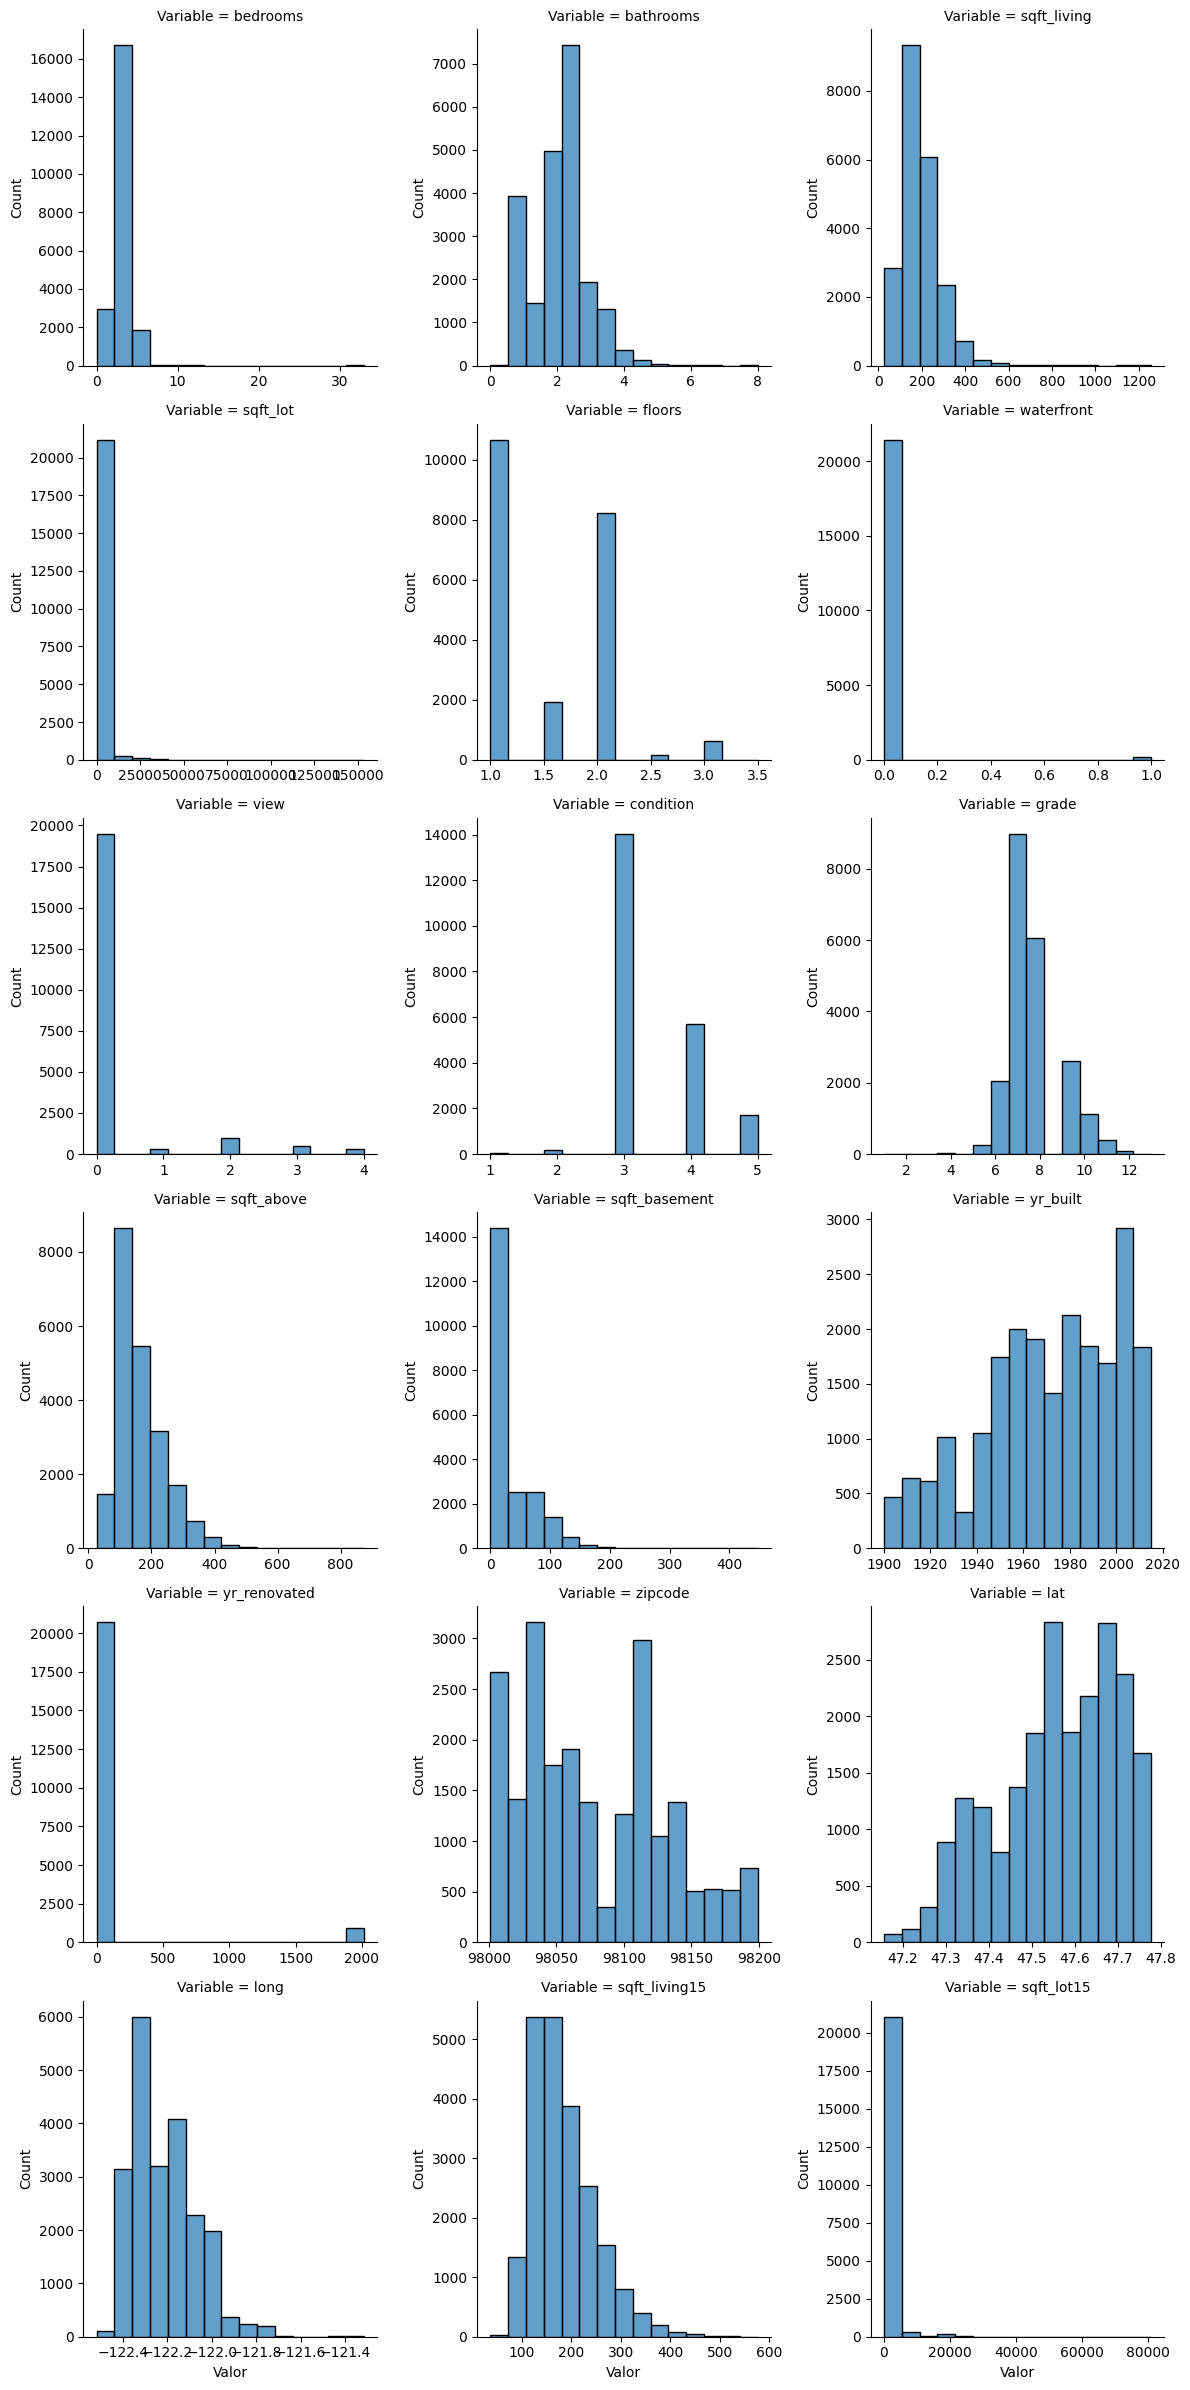

In [168]:
# transformamos el DataFrame a formato largo
df_long = df.loc[:,~df.columns.isin(['id', 'date', 'price'])].melt(var_name='Variable', value_name='Valor')

# creamos un grid de histogramas
g = sns.FacetGrid(df_long, col="Variable", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "Valor", bins=15, alpha=0.7)

plt.show()

## 2. Estimación de precios

Utilizaremos unas listas auxiliares para poder luego comparar los rendimientos de cada modelo que vayamos a crear

In [169]:
r2_list = []
mse_list = []
rmse_list = []
mae_list = []

### Arbol de decisión

Luego de un proceso iterativo, que obviaremos en esta redacción, y mediante la inspección visual de los grafos obtenidos y del gráfico de importancia de las variables, se determinó eliminar variables predictoras que no representaban importancia para nuestro modelo de `Arbol de Decisión`. Además durante el proceso se determinó el valor óptimo para el parámetro `min_samples_leaf = 5`

In [170]:
features_names = ['sqft_living',
                  'waterfront',
                  'view',
                  'grade',
                  'yr_built',
                  'lat',
                  'long',
                  'sqft_living15']

features = df[features_names].copy()
target = df[['price']].copy()

# dividimos data train vs test
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size=0.3)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(15129, 8) (15129, 1)
(6484, 8) (6484, 1)


Una vez definidas las particiones de `train` y `test` procedemos a la determinación de la profundidad del arbol, para ello realizaremos un proceso iterativo con diferentes valores posibles para la profundidad del modelo y luego ayudados de un análisis visual determinaremos cual es el valor óptimo

In [171]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []

# iteramos creando modelos de arboles regresores con diferentes valores de profundidad
for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=42, max_depth=maxdepth, min_samples_leaf=5)
  tree_model.fit(x_train, y_train)

  pred_train = tree_model.predict(x_train)
  pred_test = tree_model.predict(x_test)

  md_list.append(maxdepth)

  score_train_list.append(100.0*tree_model.score(x_train, y_train))
  score_test_list.append(100.0*tree_model.score(x_test, y_test))

  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

rs = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list})

Veamos las curvas de `precisión` de cada partición dada las diferentes profunidades máximas

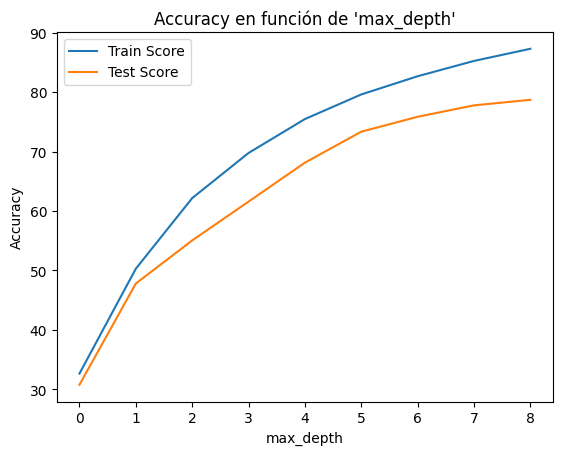

In [172]:
# visualizamos las curvas de score
rs.set_index("max_depth")
rs["score_train"].plot(label="Train Score")
rs["score_test"].plot(label="Test Score")
plt.title("Accuracy en función de 'max_depth'")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Ahora analicemos las curvas de `mse` para entrenamiento y evaluación

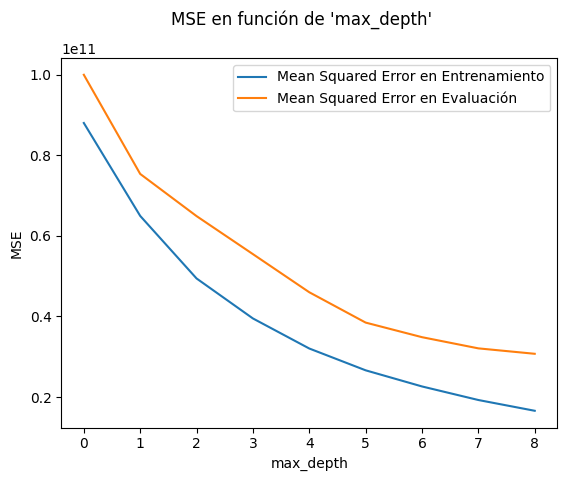

In [173]:
# visualizamos las curvas MSE
rs["mse_train"].plot(label="Mean Squared Error en Entrenamiento")
rs["mse_test"].plot(label="Mean Squared Error en Evaluación")
plt.suptitle("MSE en función de 'max_depth'")
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

Encontramo en el análisis visual un balance bastante razonable entre overfitting y underfitting a una profundidad máxima entre 5 y 6 niveles para nuestro arbol de decisión, valor en el que notamos un codo posiblemente indincado el comienzo de una zona de overfitting.

Tomaremos `max_depth = 5` donde se tiene un buen balance entre desempeño y coste computacional.

Veamos ahora como queda nuestro modelo de arbol decisorio final y sus métricas de calidad

In [174]:
# creamos el modelo con max_depth = 5
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=5)

# entrenamos el modelo
tree_model.fit(x_train, y_train)

# realizamos las predicciones
pred_train = tree_model.predict(x_train)
pred_test = tree_model.predict(x_test)

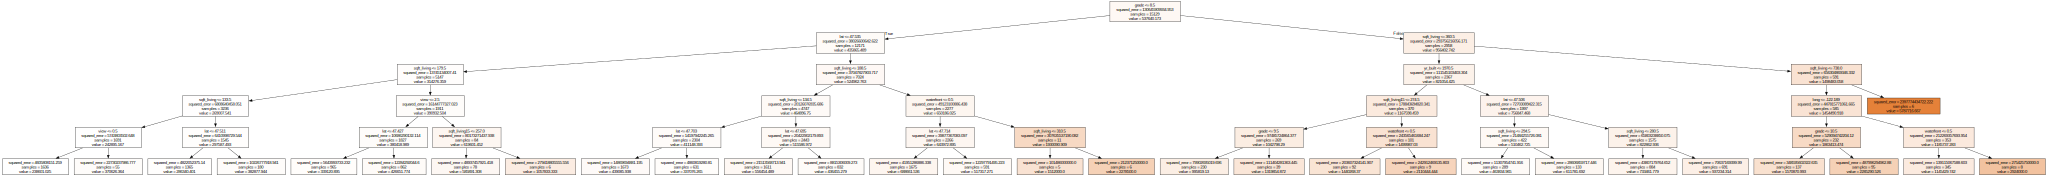

In [175]:
dot_data = export_graphviz(tree_model, out_file=None, 
                                feature_names=features_names,  
                                filled=True)
graphviz.Source(dot_data, format="png")

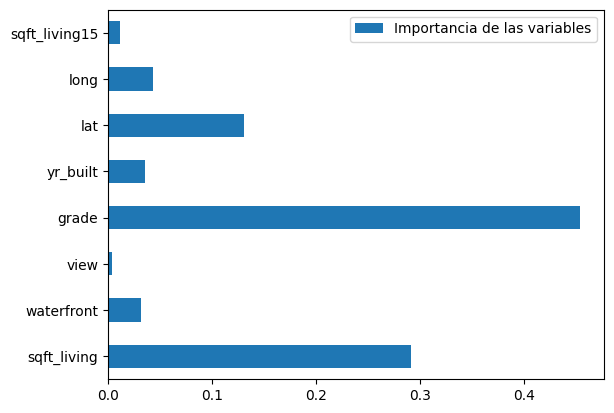

In [176]:
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=features.columns, index=["Importancia de las variables"])
df_imp.T.plot.barh()
plt.legend()
plt.show()

In [177]:
# calculamos métricas de evaluación
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)

# imprimimos las métricas de evaluación
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 120462.402
Mean Squared Error (MSE): 46016849677.861
Root Mean Squared Error (RMSE): 214515.383
R-squared (R2): 0.681


Cargamos los valores en las listas para luego comparar los modelos

In [178]:
# append de las métricas
r2_list.append(r2)
mse_list.append(mse)
mae_list.append(mae)
rmse_list.append(rmse)

### Random Forest

Al igual que para el análisis del valor óptimo del parámetro `max_depth` para nuestro modelo `Arbol de Decisión`, en el caso del número de arboles (o estimadores) ideal para nuestro modelo `Random Forest`, debemos iterar y en base a un análisis visual encontrar cual es valor que balancea de la mejor manera el accuracy en testing y la distancia entre las performace de la muestra de entrenamiento y testeo.


In [179]:
n_estimators_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []

min = 10
max = 200
hop = 20

y_train = y_train.squeeze()
y_test = y_test.squeeze()

# iteramos creando modelos de random forest con diferentes estimadores
for n_estimators in list(range(min,max,hop)):
    rf_model = RandomForestRegressor(max_depth=5, random_state=0, n_jobs=8, n_estimators=n_estimators)
    rf_model.fit(x_train, y_train)

    n_estimators_list.append(n_estimators)

    pred_train = rf_model.predict(x_train)
    pred_test = rf_model.predict(x_test)

    score_train_list.append(100.0*rf_model.score(x_train, y_train))
    score_test_list.append(100.0*rf_model.score(x_test, y_test))

    mse_train_list.append(mean_squared_error(y_train, pred_train))
    mse_test_list.append(mean_squared_error(y_test, pred_test))

rs = pd.DataFrame({"n_estimators":n_estimators_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list})

In [180]:
rs = rs.set_index("n_estimators")
rs

,score_train,score_test,mse_train,mse_test
n_estimators,,,,
10,79.313639,72.711592,2.702588e+10,3.939533e+10
30,79.882624,74.122634,2.628253e+10,3.735826e+10
50,79.659318,73.950706,2.657427e+10,3.760646e+10
70,79.631692,73.782712,2.661036e+10,3.784899e+10
90,79.863161,74.106847,2.630796e+10,3.738105e+10
110,79.850708,74.238036,2.632423e+10,3.719165e+10
130,79.805916,74.163313,2.638275e+10,3.729953e+10
150,79.756988,74.094663,2.644667e+10,3.739864e+10
170,79.861777,74.255669,2.630976e+10,3.716620e+10


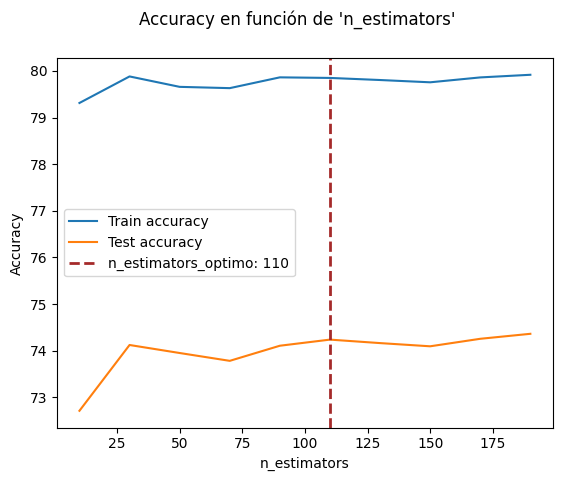

In [181]:
# visualizamos las curvas de score
rs["score_train"].plot(label="Train accuracy")
rs["score_test"].plot(label="Test accuracy")
plt.suptitle("Accuracy en función de 'n_estimators'")
plt.axvline(110, color='brown', linestyle='dashed', linewidth=2, label='n_estimators_optimo: 110')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Del análisis visual surge que un candidato adecuado para el parámetro `n_estimators` es 110, es decir nuestro random forest estará compuesto por 110 arboles internos, donde cada uno de ellos tendrá una profundidad máxima de 5 niveles.

Procedemos a la creación de nuestro `Random Forest` con el numero de estimadores propuesto

In [182]:
max_depth = 5
n_estimators = 110
n_jobs = 8

# creamos el modelo optimo
rf_model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_jobs=n_jobs, n_estimators=n_estimators)
rf_model.fit(x_train, y_train)

pred_train = rf_model.predict(x_train)
pred_test = rf_model.predict(x_test)

print("Accuracy durante entrenamiento: {:.2f}".format(100.0*rf_model.score(x_train, y_train)))
print("Accuracy durante test: {:.2f}".format(100.0*rf_model.score(x_test, y_test)))

Accuracy durante entrenamiento: 79.85
Accuracy durante test: 74.24


Encontramos las métricas de evaluación de nuestro modelo

In [183]:
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)

print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 110084.370
Mean Squared Error (MSE): 37191653431.815
Root Mean Squared Error (RMSE): 192851.377
R-squared (R2): 0.742


In [184]:
# agregamos las métricas 
r2_list.append(r2)
mse_list.append(mse)
mae_list.append(mae)
rmse_list.append(rmse)

### Grandient Boosting

Para crear nuestro modelo Gradient Boosting en primer lugar trataremos de establecer lo parámetros óptimos mediante un proceso iterativo con diversas opciones típicas tanto para `learning_rate` como para `n_estimators`. Luego analizaremos visualemente tratando de encontrar un un punto justo entre precisión y coste computacional

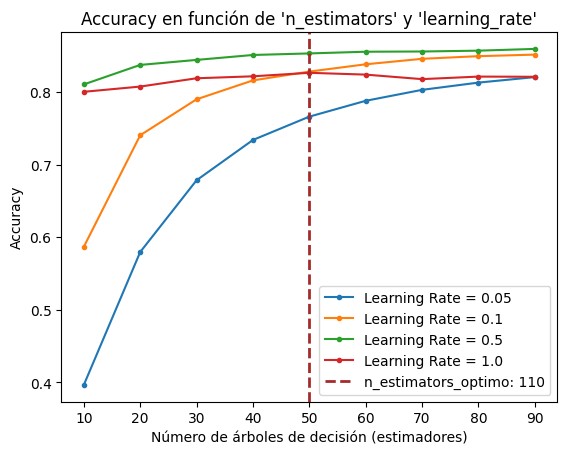

In [185]:
min = 10
max = 100
hop = 10
max_depth = 3

for learning_rate in [0.05, 0.1, 0.5, 1.0]:
  accuracy = []
  for n_estimators in range (min, max, hop): 
    gb_model = GradientBoostingRegressor(random_state=0, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    gb_model.fit(x_train, y_train)
    accuracy.append(gb_model.score(x_test, y_test))
  plt.plot(range(min,max, hop), accuracy, marker='.', linestyle='-', label="Learning Rate = " + str(learning_rate))

plt.axvline(50, color='brown', linestyle='dashed', linewidth=2, label='n_estimators_optimo: 110')
plt.title("Accuracy en función de 'n_estimators' y 'learning_rate'")
plt.xlabel('Número de árboles de decisión (estimadores)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
  

Del análisis visual surge que tenemos un punto óptimo con **50** `estimadores` y un `learning_rate` de **0.5**, juntamente con un `max_depth` de **3**. Con estos parámetros vamos a crear nuestro modélo óptimo

In [186]:
n_estimators = 50
max_depth = 3
learning_rate = 0.5

gb_model = GradientBoostingRegressor(random_state=0, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
gb_model.fit(x_train, y_train)

pred_train = gb_model.predict(x_train)
pred_test = gb_model.predict(x_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gb_model.score(x_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gb_model.score(x_test, y_test)))

Precisión sobre los datos de entrenamiento: 90.83
Precisión sobre los datos de test: 85.29


Analicemos ahora las métricas de evaluación del modelo

In [187]:
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)

print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 82615.594
Mean Squared Error (MSE): 21229418437.870
Root Mean Squared Error (RMSE): 145703.186
R-squared (R2): 0.853


In [188]:
# agregamos las métricas 
r2_list.append(r2)
mse_list.append(mse)
mae_list.append(mae)
rmse_list.append(rmse)

## 3. Comparación entre los modelos

Visualicemos las distintas métricas de los tres modelos que acabamos de crear y comparemos sus desempeños

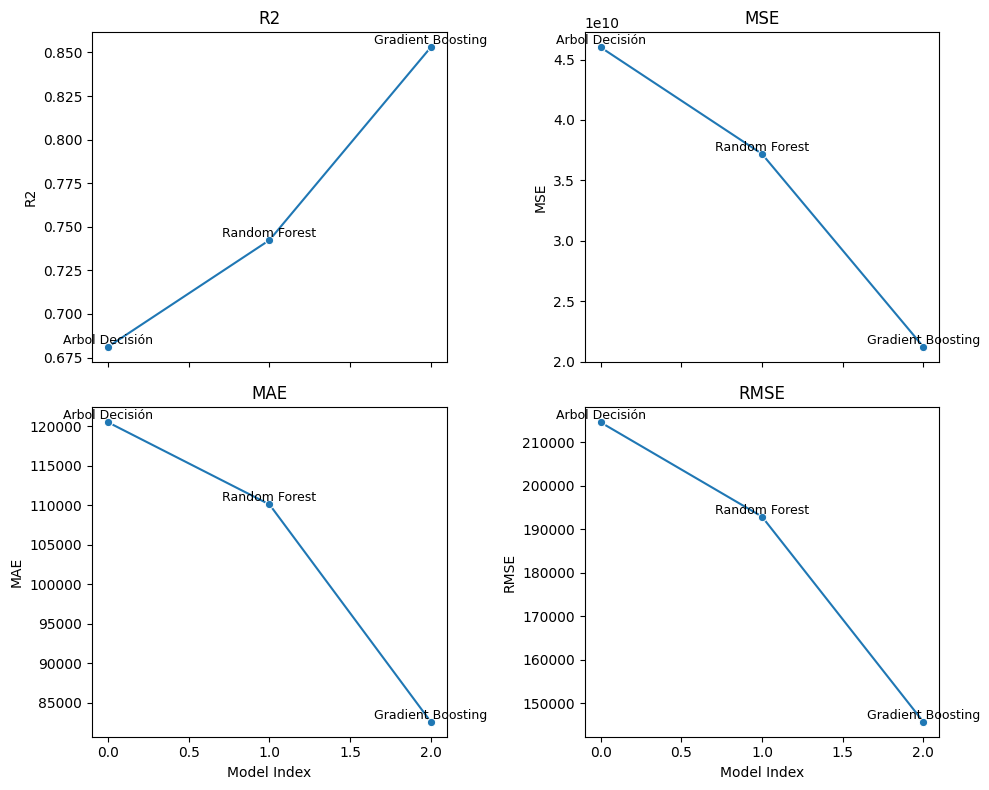

In [189]:
# creamos un dataframe auxiliar
data = pd.DataFrame({
    "model": ["Arbol Decisión", "Random Forest", "Gradient Boosting"],
    "R2": r2_list,
    "MSE": mse_list,
    "MAE": mae_list,
    "RMSE": rmse_list
})

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
axes = axes.flatten()  # Aplana la matriz de ejes

titles = ["R2", "MSE", "MAE", "RMSE"]

# dibujamos cada array en su subplot
for i, col in enumerate(data.columns[1:]):  # Excluye la columna "Model"
    sns.lineplot(data=data, x=data.index, y=col, ax=axes[i], marker="o")
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Model Index")
    axes[i].set_ylabel(col)
    
    # Agregar etiquetas para cada punto
    for idx, model_name in enumerate(data["model"]):
        axes[i].text(x=idx, y=data[col].iloc[idx], s=model_name, 
                     fontsize=9, ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()

#### $R^2$
En cuanto a precisión podemos notar que modelo `Gradient Boosting` es el que mejor se desempeña, con un $R^2$ de **0.853**, lo que indica que es capaz de explicar el **85.3%** de la varianza de los datos. Lo sigue `Random Forest` con un $R^2$ de **0.742** y por último el modelo de `Árbol de decisión` con un $R^2$ de **0.681**. Lo que sugiere que `Gradient Boosting` es el modelo más efectivo para capturar patrones en los datos.

#### MSE (Error cuadrático medio)
`Gradient Boosting` tiene el menor error cuadrático medio con **2.1×10**, seguido por `Random Forest` está en segundo lugar con **3.7×10**, mientras que el `Árbol de decisión` tiene el peor rendimiento con un $MSE$ de **4.6×10**

#### MAE (Error absoluto medio)
De nuevo, `Gradient Boosting` obtiene el menor error absoluto (**82,615**), seguido de `Random Forest` (**110,084**) y `Árbol de decisión` (**120,462**).

#### RMSE (Raíz del error cuadrático medio)
`Gradient Boosting` tiene el menor $RMSE$ con un valor de **145,703**, confirmando su ventaja en precisión, lo siguen `Random Forest` sigue con **192,851** y `Árbol de decisión` con el mayor $RMSE$ igual a **214,515**.

#### Conclusiones 

`Gradient Boosting` es claramente el modelo más preciso, con el mejor $R^2$, el menor error absoluto (MAE) y los menores errores cuadráticos (MSE y RMSE). `Random Forest` también es un modelo prometedor, pero menos efectivo que `Gradient Boosting`, especialmente en términos de precisión y errores. `Árbol de decisión` es el más sencillo y menos efectivo, probablemente debido a su naturaleza no ensamblada, que limita su capacidad de generalización en comparación con los otros dos modelos.
